In [1]:
import pandas as pd
import numpy as np
from markdown import markdown
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import glob, os
from os import path
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
%matplotlib inline

In [2]:
lst=[]
os.chdir("C:/Users/Yash/TED-Talks/cleaned_teded_data/Titles_starting_0_to_9/")
for file in glob.glob("*.md"):
    lst.append(file)
    
master=[]
for fname in lst:
    with open(fname, encoding="utf8") as f:
        m = f.read()
        html = markdown(m)
        text = ''.join(BeautifulSoup(html).findAll(text=True))
        text = text.replace('\n',' ')
        master.append(text)
lst1=[]
os.chdir("C:/Users/Yash/TED-Talks/cleaned_teded_data/Titles_starting_A_to_O/")
for file in glob.glob("*.md"):
    lst1.append(file)
    
master1=[]
for fname in lst1:
    with open(fname, encoding="utf8") as f:
        m = f.read()
        html = markdown(m)
        text = ''.join(BeautifulSoup(html).findAll(text=True))
        text = text.replace('\n',' ')
        master1.append(text)

lst2=[]
os.chdir("C:/Users/Yash/TED-Talks/cleaned_teded_data/Titles_starting_P_to_Z/")
for file in glob.glob("*.md"):
    lst2.append(file)
    
master2=[]
for fname in lst2:
    with open(fname, encoding="utf8") as f:
        m = f.read()
        html = markdown(m)
        text = ''.join(BeautifulSoup(html).findAll(text=True))
        text = text.replace('\n',' ')
        master2.append(text)

C:\Users\Yash\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\Yash\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [3]:
master_lst = lst + lst1 + lst2

In [4]:
len(master_lst)

1366

In [5]:
final_master = master + master1 + master2

In [6]:
len(final_master)

1366

In [7]:
df1 = pd.DataFrame(data=final_master)

In [8]:
df1['Title'] = master_lst

In [9]:
df1.columns=['Content','Title']

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366 entries, 0 to 1365
Data columns (total 2 columns):
Content    1366 non-null object
Title      1366 non-null object
dtypes: object(2)
memory usage: 21.4+ KB


In [11]:
df1.head()

,Content,Title
0,there's currently over a thousand TEDTalks on ...,1000_TEDTalks_6_words_Sebastian_Wernicke.md
1,so today I'm gonna tell you about some people ...,3_stories_of_local_eco_entrepreneurship_Majora...
2,imagine a big explosion as you climb through 3...,3_things_I_learned_while_my_plane_crashed_Ric_...
3,Translator: Jennifer Cody Reviewer: Jessica Ru...,3_tips_to_boost_your_confidence_TED_Ed.md
4,so what I want to try to do is tell a quick st...,404_the_story_of_a_page_not_found_Renny_Gleeso...


In [12]:
df1.tail()

,Content,Title
1361,I'm a brain scientist and as a brain scientist...,Your_brain_on_video_games_Daphne_Bavelier.md
1362,I am my writer writing books is my profession ...,Your_elusive_creative_genius_Elizabeth_Gilbert.md
1363,one way to change our genes is to make new one...,Your_genes_are_not_your_fate_Dean_Ornish.md
1364,hi this is my mobile phone a mobile phone can ...,Your_phone_company_is_watching_Malte_Spitz.md
1365,Translator: Andrea McDonough Reviewer: Bedirha...,You_are_your_microbes_Jessica_Green_and_Karen_...


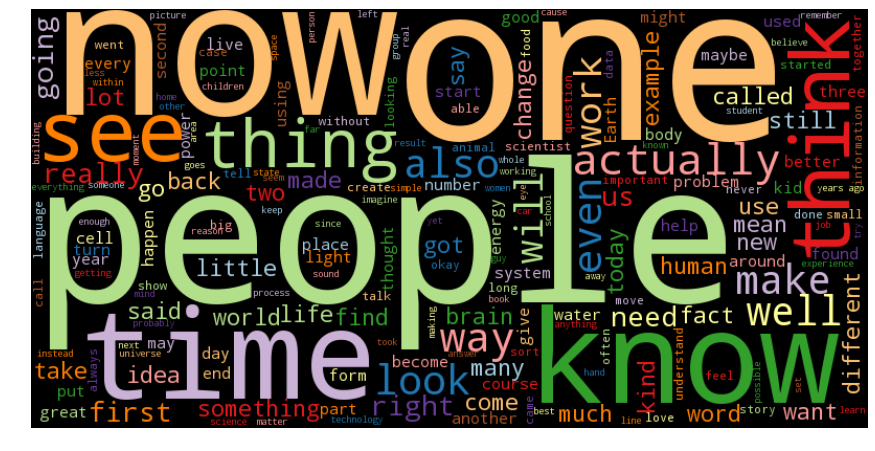

In [13]:
wordcloud = WordCloud(stopwords=STOPWORDS,relative_scaling=.4,
                          background_color='black',
                          width=800,
                          height=400,colormap='Paired')


wordcloud = wordcloud.generate(''.join(final_master))

wordcloud.to_file("C:/Users/Yash/TED-Talks/ted_ed_cloud.png")
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
df1.to_pickle("C:/Users/Yash/TED-Talks/ted_ed.pkl")